In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline  

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
#print(cancer["DESCR"])

In [10]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df)

StandardScaler()

In [16]:
scaled_data = scaler.transform(df)

In [17]:
#PCA
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(scaled_data)

PCA(n_components=2)

In [22]:
x_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape

(569, 30)

In [24]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

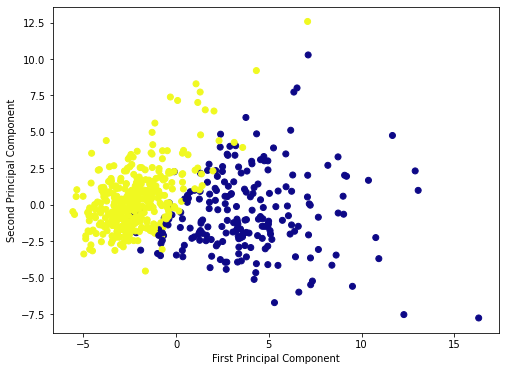

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [28]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [30]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

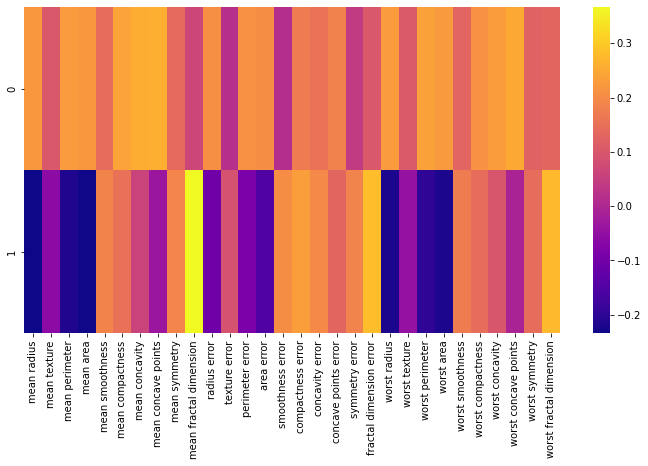

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [33]:
from sklearn.datasets import make_blobs

In [35]:
data = make_blobs(n_samples=200,n_features=2,centers = 4,cluster_std=1.8,random_state=101)

In [37]:
data[0].shape

(200, 2)

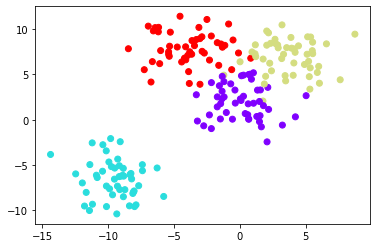

In [41]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [43]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=8)

In [73]:
kmeans.fit(data[0])

KMeans()

In [74]:
kmeans.cluster_centers_

array([[-4.67940744,  7.98950994],
       [-9.18960987, -8.53584776],
       [ 2.13494294,  4.43273041],
       [-1.46917589,  3.07635847],
       [-9.67203831, -5.13061964],
       [ 0.9921625 ,  8.22307756],
       [ 0.84480958,  0.36388032],
       [ 5.12804689,  7.09818233]])

In [75]:
kmeans.labels_

array([0, 7, 3, 5, 7, 4, 5, 3, 5, 3, 0, 3, 5, 2, 0, 6, 7, 3, 4, 0, 4, 6,
       2, 1, 0, 1, 1, 6, 7, 2, 0, 1, 7, 6, 3, 0, 4, 4, 1, 6, 4, 0, 5, 0,
       3, 5, 0, 2, 1, 3, 6, 0, 7, 6, 4, 3, 2, 6, 0, 7, 1, 5, 4, 5, 5, 6,
       4, 7, 5, 4, 5, 2, 4, 3, 4, 7, 5, 3, 0, 3, 3, 4, 7, 4, 6, 6, 6, 0,
       2, 4, 1, 4, 4, 3, 2, 1, 7, 0, 4, 7, 3, 4, 2, 3, 5, 3, 4, 7, 1, 4,
       2, 0, 0, 5, 1, 7, 0, 0, 5, 5, 2, 0, 3, 0, 3, 7, 0, 6, 1, 0, 0, 0,
       6, 1, 4, 0, 2, 3, 7, 6, 1, 2, 4, 5, 5, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       6, 0, 2, 5, 7, 6, 7, 6, 3, 0, 4, 0, 3, 7, 0, 6, 7, 6, 0, 5, 2, 0,
       7, 5, 1, 5, 0, 1, 1, 5, 4, 1, 4, 1, 1, 6, 4, 7, 7, 0, 4, 2, 7, 7,
       4, 6])

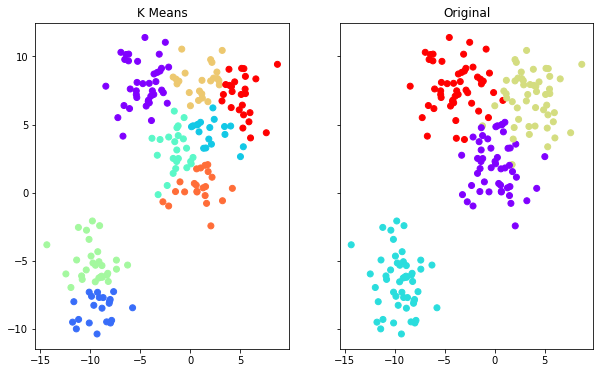

In [76]:
fig , (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')